In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [48]:
df_data = pd.read_csv("task/data.csv")
df_data.head(2)

,stateur,statemb,state,age,joblost,school12,married,dkids,dykids,rr,head,id
0,4.5,18.063430,42,49,other,no,no,no,no,0.290631,yes,2562
1,10.5,77.439622,55,26,slack_work,no,no,yes,yes,0.520202,yes,1294


In [49]:
df_data[df_data.duplicated()] #600  duplicated / 5477

,stateur,statemb,state,age,joblost,school12,married,dkids,dykids,rr,head,id
4877,5.7,NaN,59,28,slack_work,no,no,no,no,0.500000,yes,1071
4878,10.2,6.168843,43,36,other,no,no,no,no,0.589147,yes,130
4879,5.2,12.337687,86,31,slack_work,no,yes,yes,yes,0.264151,no,2330
4880,6.0,111.430472,14,27,slack_work,no,yes,no,no,0.500000,yes,625
4881,8.9,NaN,74,61,position_abolished,no,yes,no,no,0.473282,no,4526
...,...,...,...,...,...,...,...,...,...,...,...,...
5472,14.4,28.840015,55,41,slack_work,no,yes,yes,no,0.403738,yes,4542
5473,7.0,NaN,31,31,other,no,yes,yes,no,0.386111,yes,2100
5474,5.4,128.000000,23,27,other,yes,yes,yes,yes,0.515151,yes,930
5475,7.3,NaN,74,61,position_abolished,no,yes,yes,no,0.419780,yes,4864


In [50]:
df_data[df_data.id.duplicated()]

,stateur,statemb,state,age,joblost,school12,married,dkids,dykids,rr,head,id
4877,5.7,NaN,59,28,slack_work,no,no,no,no,0.500000,yes,1071
4878,10.2,6.168843,43,36,other,no,no,no,no,0.589147,yes,130
4879,5.2,12.337687,86,31,slack_work,no,yes,yes,yes,0.264151,no,2330
4880,6.0,111.430472,14,27,slack_work,no,yes,no,no,0.500000,yes,625
4881,8.9,NaN,74,61,position_abolished,no,yes,no,no,0.473282,no,4526
...,...,...,...,...,...,...,...,...,...,...,...,...
5472,14.4,28.840015,55,41,slack_work,no,yes,yes,no,0.403738,yes,4542
5473,7.0,NaN,31,31,other,no,yes,yes,no,0.386111,yes,2100
5474,5.4,128.000000,23,27,other,yes,yes,yes,yes,0.515151,yes,930
5475,7.3,NaN,74,61,position_abolished,no,yes,yes,no,0.419780,yes,4864


In [51]:
df_data[df_data.id==1071]

,stateur,statemb,state,age,joblost,school12,married,dkids,dykids,rr,head,id
773,5.7,NaN,59,28,slack_work,no,no,no,no,0.5,yes,1071
4877,5.7,NaN,59,28,slack_work,no,no,no,no,0.5,yes,1071


# Drop duplicates

In [52]:
df_data = df_data.drop_duplicates()
df_data.shape

(4877, 12)

# NA values

In [53]:
del df_data['statemb'] # Delete column cause of 669 nan values

In [54]:
df_data[-df_data.isna().any(axis=1)]

,stateur,state,age,joblost,school12,married,dkids,dykids,rr,head,id
0,4.5,42,49,other,no,no,no,no,0.290631,yes,2562
1,10.5,55,26,slack_work,no,no,yes,yes,0.520202,yes,1294
2,7.2,21,40,other,yes,yes,no,no,0.432490,yes,1118
3,5.8,56,51,slack_work,no,yes,no,no,0.500000,no,3056
4,6.5,58,33,slack_work,yes,yes,yes,yes,0.390625,yes,4086
...,...,...,...,...,...,...,...,...,...,...,...
4872,7.4,33,35,slack_work,yes,no,yes,no,0.463557,yes,1232
4873,7.0,74,39,slack_work,no,yes,no,no,0.393750,yes,1850
4874,8.0,74,59,slack_work,no,yes,yes,no,0.372428,yes,1152
4875,6.3,41,33,slack_work,no,yes,yes,yes,0.500000,yes,4095


In [55]:
# Drop NA values 

In [56]:
df_data = df_data[-df_data.isna().any(axis=1)] # 4877 rows left
df_data.shape

(4877, 11)

# Data types

In [57]:
df_data.dtypes

stateur     float64
state         int64
age           int64
joblost      object
school12     object
married      object
dkids        object
dykids       object
rr          float64
head         object
id            int64
dtype: object

In [58]:
for column in df_data:
    if [True for i in df_data[column].unique() if type(i) == np.float64 or type(i) == np.int64]:
        print(column, min(df_data[column].unique()), max(df_data[column].unique()))
    else:
        print(column, df_data[column].unique())

stateur 2.2 18.0
state 11 95
age 20 61
joblost ['other' 'slack_work' 'position_abolished' 'seasonal_job_ended']
school12 ['no' 'yes']
married ['no' 'yes']
dkids ['no' 'yes']
dykids ['no' 'yes']
rr 0.038610000000000005 0.6911765000000001
head ['yes' 'no']
id 1 4877


In [59]:
df_data[(df_data.dkids=='no')&(df_data.dykids=='yes')] # no inconsistent data

,stateur,state,age,joblost,school12,married,dkids,dykids,rr,head,id


# Coding categorical variables

In [60]:
columns_to_categorical = ['joblost', 'school12', 'married', 'dkids', 'dykids', 'head' ]

def create_categorical_column(df, column):
    column_name = f'{column}_cat'
    df[column_name] = df[column].astype('category').cat.codes

for column in columns_to_categorical:
    create_categorical_column(df_data, column)

In [61]:
df_data.head(2)

,stateur,state,age,joblost,school12,married,dkids,dykids,rr,head,id,joblost_cat,school12_cat,married_cat,dkids_cat,dykids_cat,head_cat
0,4.5,42,49,other,no,no,no,no,0.290631,yes,2562,0,0,0,0,0,1
1,10.5,55,26,slack_work,no,no,yes,yes,0.520202,yes,1294,3,0,0,1,1,1


# EDA

In [62]:
df_data.columns

Index(['stateur', 'state', 'age', 'joblost', 'school12', 'married', 'dkids',
       'dykids', 'rr', 'head', 'id', 'joblost_cat', 'school12_cat',
       'married_cat', 'dkids_cat', 'dykids_cat', 'head_cat'],
      dtype='object')

In [63]:
df_data.shape

(4877, 17)

In [64]:
df_data[['stateur', 'state']] # different stateur for the same state - I assume data comes from different times

,stateur,state
0,4.5,42
1,10.5,55
2,7.2,21
3,5.8,56
4,6.5,58
...,...,...
4872,7.4,33
4873,7.0,74
4874,8.0,74
4875,6.3,41


In [65]:
df_data.describe()

,stateur,state,age,rr,id,joblost_cat,school12_cat,married_cat,dkids_cat,dykids_cat,head_cat
count,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000
mean,7.511031,52.808079,36.129998,0.438366,2439.000000,1.583350,0.190076,0.632766,0.485749,0.221653,0.680541
std,2.500579,25.834967,10.600737,0.106194,1408.012962,1.416341,0.392401,0.482100,0.499848,0.415401,0.466315
min,2.200000,11.000000,20.000000,0.038610,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,31.000000,28.000000,0.375212,1220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,55.000000,34.000000,0.490446,2439.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,9.000000,74.000000,43.000000,0.511574,3658.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,18.000000,95.000000,61.000000,0.691177,4877.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df_data.state.max()

95

In [67]:
df_data.dykids.value_counts()

no     3796
yes    1081
Name: dykids, dtype: int64

In [68]:
# After cleaning data 4877 cases
# Mean of unemployment rate 7,5%
# Mean of age - 52,8 years old. Median age = 34 years old
# 63% of people was married
# Barely 19% has more than 12 years of school 
# 48% has child and 22 % young child
# 68% of people in our data was head of household

In [69]:
df_data_task = df_data[df_data.age<df_data.age.median()]
df_data_task['state_times_rr'] = df_data_task['state']*df_data_task['rr']
task1 = df_data_task.groupby(['joblost', 'dykids']).mean()['state_times_rr'].reset_index(name="state_times_rr_mean")['state_times_rr_mean']
task_end = df_data_task.groupby(['joblost', 'dykids']).size().reset_index(name='n')
task_end['state_times_rr_mean'] = task1
task_end

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,joblost,dykids,n,state_times_rr_mean
0,other,no,544,24.060890
1,other,yes,287,23.879211
2,position_abolished,no,98,23.932927
3,position_abolished,yes,43,22.244912
4,seasonal_job_ended,no,73,22.843874
5,seasonal_job_ended,yes,35,26.206069
6,slack_work,no,805,23.667435
7,slack_work,yes,418,24.076024


# Plots 

In [70]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [71]:
# Because of delete statemb column, i upload data again
df_data_org = pd.read_csv("task/data.csv")
for column in columns_to_categorical:
    create_categorical_column(df_data_org, column)
plots_columns = [ ['joblost_cat', 'rr'],  ['joblost_cat', 'dkids_cat'],  ['statemb', 'rr'], ['state', 'rr']]
for x,y in plots_columns:
    print(df_data_org[[x, y]].corr())
#     print(sns.heatmap(df_data_org[[x, y]].corr()))
#     plt.show()

             joblost_cat        rr
joblost_cat     1.000000  0.003158
rr              0.003158  1.000000
             joblost_cat  dkids_cat
joblost_cat     1.000000   0.003432
dkids_cat       0.003432   1.000000
         statemb       rr
statemb  1.00000  0.22889
rr       0.22889  1.00000
          state        rr
state  1.000000 -0.189881
rr    -0.189881  1.000000


In [72]:
#  None of these features are significant correlated. Significant correlation should have corelation value at least > 0.5 or < -0.5 

# Classification

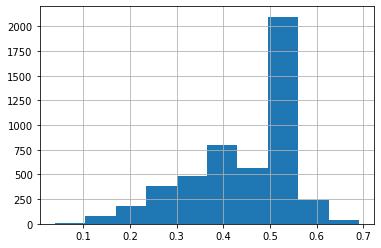

In [73]:
df_data.rr.hist() # Most of our data > 0.5

In [74]:
df_predict = pd.read_csv("task/data_predict.csv")
print("Deleting duplicated", len(df_predict[df_predict.duplicated()]), 'row')
df_predict = df_predict.drop_duplicates()
print(df_predict.shape[0], len(df_predict[-df_predict.isna().any(axis=1)])) # no NA values
for column in columns_to_categorical:
    create_categorical_column(df_predict, column)
df_predict.head(2)

Deleting duplicated 1 row
3999 3999


,stateur,statemb,state,age,joblost,school12,married,dkids,dykids,head,id,joblost_cat,school12_cat,married_cat,dkids_cat,dykids_cat,head_cat
0,6.3,183.725636,52,23,slack_work,no,no,no,no,no,12667,3,0,0,0,0,0
1,9.7,125.004679,94,59,position_abolished,no,yes,no,no,no,10633,1,0,1,0,0,0


In [75]:
[i for i in df_data.columns if i not in df_predict.columns]

['rr']

In [76]:
df_predict.shape

(3999, 17)

In [77]:
df_predict.describe()

,stateur,statemb,state,age,id,joblost_cat,school12_cat,married_cat,dkids_cat,dykids_cat,head_cat
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,7.494124,87.117585,55.395099,36.078770,12449.377094,1.593648,0.195299,0.632658,0.488372,0.216054,0.686172
std,2.490017,34.922020,25.276044,10.428395,1411.136494,1.417277,0.396480,0.482141,0.499927,0.411603,0.464106
min,2.200000,53.182517,11.000000,20.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,62.824232,35.000000,28.000000,11235.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,74.002115,55.000000,35.000000,12453.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,9.000000,98.246170,81.000000,43.000000,13669.500000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,18.000000,209.236472,95.000000,61.000000,14877.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_data.describe()

,stateur,state,age,rr,id,joblost_cat,school12_cat,married_cat,dkids_cat,dykids_cat,head_cat
count,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000
mean,7.511031,52.808079,36.129998,0.438366,2439.000000,1.583350,0.190076,0.632766,0.485749,0.221653,0.680541
std,2.500579,25.834967,10.600737,0.106194,1408.012962,1.416341,0.392401,0.482100,0.499848,0.415401,0.466315
min,2.200000,11.000000,20.000000,0.038610,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,31.000000,28.000000,0.375212,1220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,55.000000,34.000000,0.490446,2439.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,9.000000,74.000000,43.000000,0.511574,3658.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,18.000000,95.000000,61.000000,0.691177,4877.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


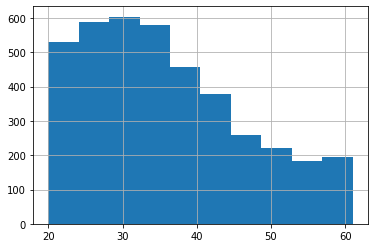

In [79]:
df_predict.age.hist()

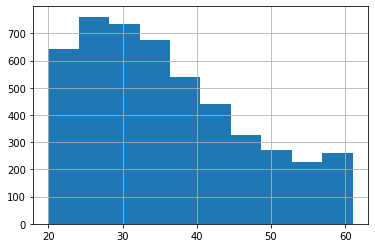

In [80]:
df_data.age.hist()

In [81]:
[i for i in df_predict.state.unique() if i not in df_data.state.unique()] # there's not state in predict data that wasnt in original data

[]

In [120]:
df_sub = df_data.loc[:, df_data.columns != 'rr']

In [121]:
for column in df_sub:
    if [True for i in df_sub[column].unique() if type(i) == np.float64 or type(i) == np.int64]:
        print('Train: ',column, min(df_sub[column].unique()), max(df_sub[column].unique()))
        print('Test: ', column, min(df_predict[column].unique()), max(df_predict[column].unique()))
    else:
        print('Train: ', column, df_sub[column].unique())
        print('Test: ', column, df_sub[column].unique())

Train:  stateur 2.2 18.0
Test:  stateur 2.2 18.0
Train:  state 11 95
Test:  state 11 95
Train:  age 20 61
Test:  age 20 61
Train:  joblost ['other' 'slack_work' 'position_abolished' 'seasonal_job_ended']
Test:  joblost ['other' 'slack_work' 'position_abolished' 'seasonal_job_ended']
Train:  school12 ['no' 'yes']
Test:  school12 ['no' 'yes']
Train:  married ['no' 'yes']
Test:  married ['no' 'yes']
Train:  dkids ['no' 'yes']
Test:  dkids ['no' 'yes']
Train:  dykids ['no' 'yes']
Test:  dykids ['no' 'yes']
Train:  head ['yes' 'no']
Test:  head ['yes' 'no']
Train:  id 1 4877
Test:  id 10001 14877
Train:  joblost_cat 0 3
Test:  joblost_cat 0 3
Train:  school12_cat 0 1
Test:  school12_cat 0 1
Train:  married_cat 0 1
Test:  married_cat 0 1
Train:  dkids_cat 0 1
Test:  dkids_cat 0 1
Train:  dykids_cat 0 1
Test:  dykids_cat 0 1
Train:  head_cat 0 1
Test:  head_cat 0 1


In [82]:
# Yes, it is appriopriate to train a model on given data and apply it on second, because of similiarity of data
# Classification model could be regression 0-1, cause rr is continous column
# Alternative approach could be: creating categorical variable for classification: More than 0.5 and less than 0.5, but this attitude has a lot of loss information
# Model performance can be estimated by mean squared error - the smaller the better

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

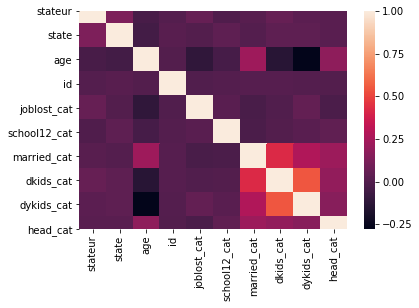

In [123]:
sns.heatmap(df_data_copy.corr()) # check highly correlated variables

In [140]:
df_data_copy = df_data.copy()

In [141]:
y = df_data_copy.pop('rr')
X = df_data[['stateur', 'state', 'age', 'joblost_cat', 'school12_cat', 'married_cat','dkids_cat', 'dykids_cat', 'head_cat']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
len(X_train), len(X_test)

(3901, 976)

In [142]:
features = ['stateur', 'state', 'age', 'joblost_cat', 'school12_cat', 'married_cat','dkids_cat', 'dykids_cat', 'head_cat']

In [151]:
def predict(model, x_train, x_test, y_train, y_test):
    '''Assume that train data and test data are pandas dataframe'''
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return pred

def evaluate_model(prediction, true_values):
    print('MSE: ', mean_squared_error(true_values, prediction))
    print('Coefficient of determination (R^2): %.2f'      % r2_score(true_values, prediction))

In [130]:
!pip install xgboost

In [134]:
from xgboost import XGBRegressor

In [185]:
#Models
decisiontreecls = DecisionTreeRegressor(random_state=0)
randomforestcls = RandomForestRegressor(max_depth=50, random_state=0)
linearreg = LinearRegression()
xgboost = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

models = [decisiontreecls, randomforestcls,xgboost, linearreg ]
models_name = ['DecisionTreeRegressor', 'RandomForestRegressor', 'XGBoost', 'LinearRegression']

for nr, model in enumerate(models):
    pred = predict(model, X_train, X_test, y_train, y_test)
    print(models_name[nr])
    evaluate_model(pred, y_test)
    if nr != 3:
        for i,j in enumerate(features):
            print(f'{j}:', round(model.feature_importances_[i],3))
    else:
        importance = model.coef_
        for i,v in enumerate(importance):
            print('Feature: %0d, %s, Score: %.5f' % (i+1,features[i], v))


DecisionTreeRegressor
MSE:  0.016834358976583138
Coefficient of determination (R^2): -0.49
stateur: 0.209
state: 0.322
age: 0.248
joblost_cat: 0.061
school12_cat: 0.029
married_cat: 0.029
dkids_cat: 0.03
dykids_cat: 0.024
head_cat: 0.047
RandomForestRegressor
MSE:  0.00999019656022135
Coefficient of determination (R^2): 0.11
stateur: 0.222
state: 0.313
age: 0.245
joblost_cat: 0.059
school12_cat: 0.034
married_cat: 0.027
dkids_cat: 0.029
dykids_cat: 0.023
head_cat: 0.048


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGBoost
MSE:  0.01144070407166609
Coefficient of determination (R^2): -0.02
stateur: 0.107
state: 0.162
age: 0.104
joblost_cat: 0.088
school12_cat: 0.093
married_cat: 0.114
dkids_cat: 0.096
dykids_cat: 0.098
head_cat: 0.136
LinearRegression
MSE:  0.009813480024948926
Coefficient of determination (R^2): 0.13
Feature: 1, stateur, Score: -0.00259
Feature: 2, state, Score: -0.00070
Feature: 3, age, Score: -0.00065
Feature: 4, joblost_cat, Score: -0.00137
Feature: 5, school12_cat, Score: -0.02909
Feature: 6, married_cat, Score: -0.02206
Feature: 7, dkids_cat, Score: -0.00046
Feature: 8, dykids_cat, Score: 0.01261
Feature: 9, head_cat, Score: -0.03904


<BarContainer object of 9 artists>

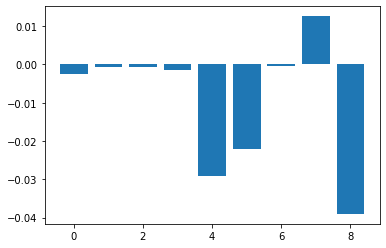

In [192]:
plt.bar([x for x in range(len(importance))], importance)

In [ ]:
# Lowest MSE for LinearRegression

In [154]:
!pip install eli5

In [155]:
import eli5
from eli5.sklearn import PermutationImportance

In [166]:
perm = PermutationImportance(models[3]).fit(X_test, y_test) # for linear regression
eli5.show_weights(perm)

Weight,Feature
0.0707 ± 0.0149,x1
0.0585 ± 0.0101,x8
0.0321 ± 0.0102,x4
0.0214 ± 0.0133,x5
0.0172 ± 0.0056,x2
0.0081 ± 0.0037,x7
0.0064 ± 0.0048,x0
-0.0002 ± 0.0001,x6
-0.0003 ± 0.0008,x3


In [189]:
features[0], features[8]

('stateur', 'head_cat')

In [180]:
# Most important features in my model: ('stateur', 'head_cat')

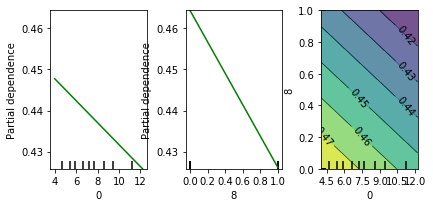

In [191]:
from sklearn.inspection import plot_partial_dependence

features_nr = [0,8, (0,8)]
plot_partial_dependence(models[3].fit(X, y), X, features_nr) 

In [194]:
df_predict[features]

,stateur,state,age,joblost_cat,school12_cat,married_cat,dkids_cat,dykids_cat,head_cat
0,6.3,52,23,3,0,0,0,0,0
1,9.7,94,59,1,0,1,0,0,0
2,4.2,15,38,2,0,0,0,0,0
3,6.7,35,21,3,0,0,0,0,1
4,10.3,95,29,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3995,8.8,55,53,0,0,1,0,0,0
3996,7.1,15,32,3,0,1,1,1,1
3997,12.4,86,41,0,0,1,1,0,1
3998,10.1,51,37,0,0,0,1,0,0


In [196]:
predict_df_predict = model.predict(df_predict[features])

In [ ]:
# Difference between df_predict and original data can be estimated by some statistical test, e.g. Kolmogorov-Smirnov test for difference in distribution of 2 data

In [197]:
predict_df_predict

array([0.49380754, 0.40592517, 0.515788  , ..., 0.38275425, 0.4781983 ,
       0.45866746])

In [200]:
df_data['rr'].values

array([0.290631 , 0.520202 , 0.4324895, ..., 0.372428 , 0.5      ,
       0.4954129])

In [201]:
from scipy.stats import ks_2samp

In [202]:
ks_2samp(predict_df_predict, df_data['rr'].values) #p_value = 1 - No significant difference between 2 distributions

Ks_2sampResult(statistic=0.4355659860218284, pvalue=1.0)